INFO 501 Final Project

Data Loading

In [1]:
#Here import necessary libraries, modules, functions etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#Load the .csv file as a pandas dataframe 
#From the dataset provided in the report and submission comments
path = 'london_weather.csv'
df = pd.read_csv(path, )
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


Data Preprocessing

In [2]:
#This is to clean the dates column into typical the typical format used to display dates
df['date']

cleaned_dates = []
final_dates = []
for i in df['date']:
    date = str(i)
    day = date[6:]
    month = date[4:6]
    year = date[:4]
    cleaned_dates.append(month)
    cleaned_dates.append('/')
    cleaned_dates.append(day)
    cleaned_dates.append('/')
    cleaned_dates.append(year)
    cleaned_dates = "".join(cleaned_dates)
    final_dates.append(cleaned_dates)
    cleaned_dates = []
df['date']=final_dates


In [3]:
#To show the new date column
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,01/01/1979,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,01/02/1979,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,01/03/1979,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,01/04/1979,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,01/05/1979,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,12/27/2020,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,12/28/2020,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,12/29/2020,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,12/30/2020,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [4]:
#Shows the total number of null values in the entire dataset
total_null=df.isnull().sum().sum()
total_null

1533

In [5]:
#shows the total number of rows with at least one null values
row_test = df.isnull().any(axis=1)
index = 0
rows_with_a_null = []
total = 0
for i in row_test:
    index = index + 1
    if i == True:
        rows_with_a_null.append(index) 
        total = total + 1
#rows_with_a_null is a list with all the unique rows that have at least one null. This list is quite long and therefore not displayed
print(f"Total rows with at least one null value: {total}")

Total rows with at least one null value: 1498


In [6]:
#To see how many null values are in each column
for i in df:
    x= df[i].isnull()
    count = 0
    for index in x:
        if index == True:
            count = count + 1
    print(i, count)
    count = 0

date 0
cloud_cover 19
sunshine 0
global_radiation 19
max_temp 6
mean_temp 36
min_temp 2
precipitation 6
pressure 4
snow_depth 1441


In [7]:
#This drops the snow dpeth column since this has a large amount of null values
df.drop(columns=['snow_depth'], inplace=True)

In [8]:
#This fills the other null values with the previous value. This is effective in this context since with data over time for various weather features, a previous days data is likely to be quite similar to that of a specific day
df.fillna(method='bfill', inplace=True)

Exploratory Data Analysis

In [9]:
#Gives the brief statistics with respect to each feature
for i in df:
    col_stats = df[i].describe()
    print(f"Overview statistics for {i}")
    print(col_stats)
    print()

Overview statistics for date
count          15341
unique         15341
top       01/01/1979
freq               1
Name: date, dtype: object

Overview statistics for cloud_cover
count    15341.000000
mean         5.269930
std          2.070234
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: cloud_cover, dtype: float64

Overview statistics for sunshine
count    15341.000000
mean         4.350238
std          4.028339
min          0.000000
25%          0.500000
50%          3.500000
75%          7.200000
max         16.000000
Name: sunshine, dtype: float64

Overview statistics for global_radiation
count    15341.000000
mean       118.879147
std         88.935151
min          8.000000
25%         41.000000
50%         95.000000
75%        186.000000
max        402.000000
Name: global_radiation, dtype: float64

Overview statistics for max_temp
count    15341.000000
mean        15.391076
std          6.556853
min         -6.2

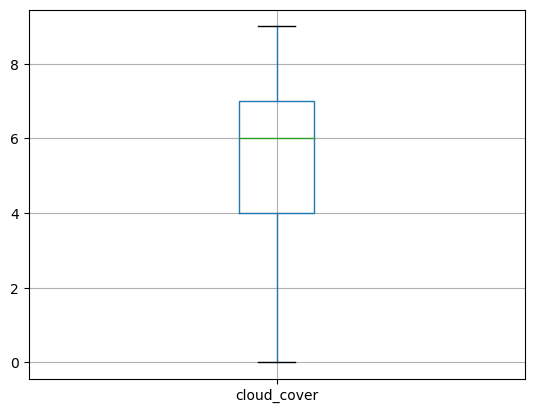

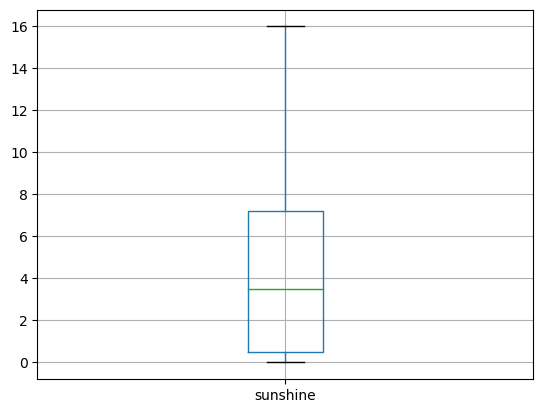

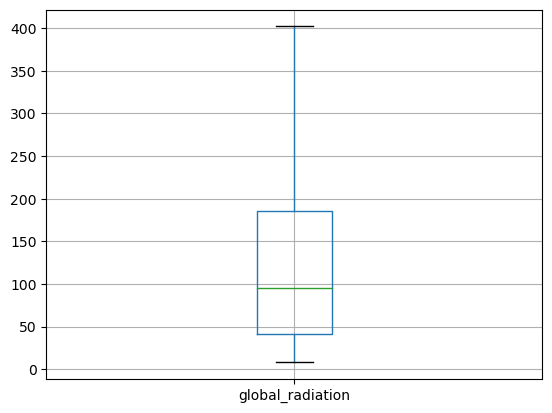

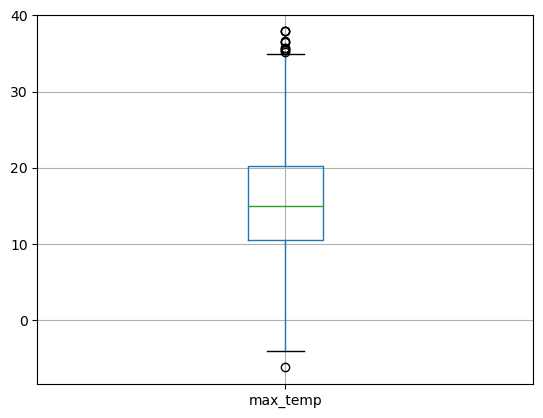

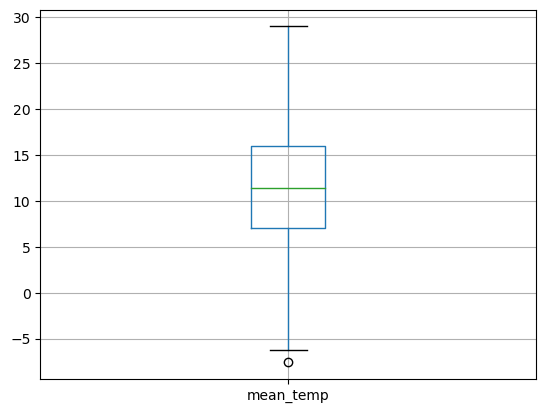

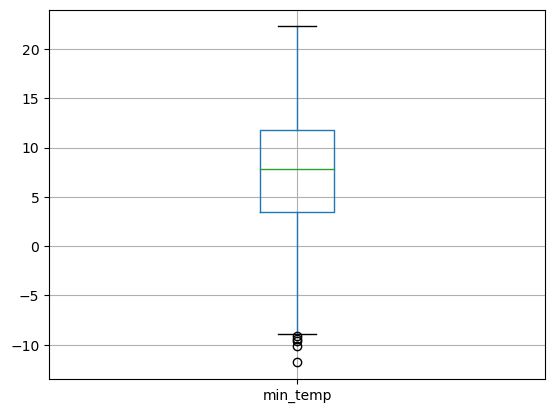

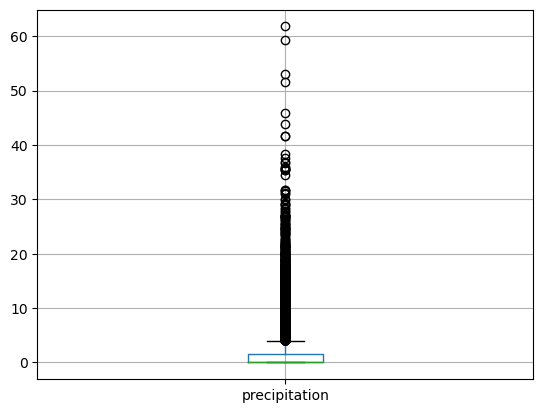

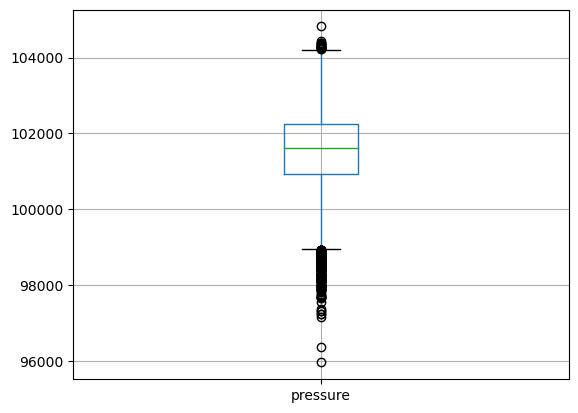

In [10]:
#Show how each the data from each feature is distributed as a boxplot. This is for the numeric columns.
for i in df:
    if df[i].dtype == float:
        df.boxplot(column=i)
        plt.show()

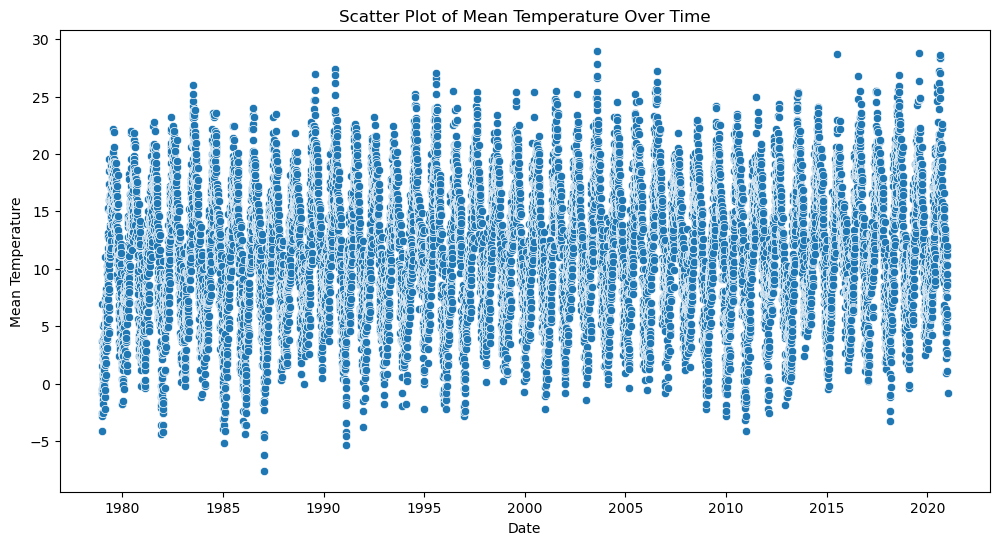

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='mean_temp', data=df)

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Scatter Plot of Mean Temperature Over Time')
plt.show()

#Scatterplot to show mean temperature over the full range of dates in the data. 
#Due to large amount of years, the yearly fluctuations are captured seemingly onm top of each other since they all
#need to be fit onto an inadequate sized visualization. The potential seasonalility can already be visually notes

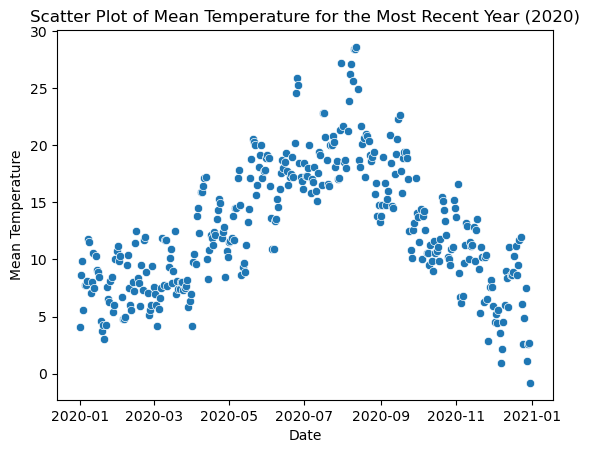

In [12]:
most_recent_year = df['date'].max().year
recent_year_data = df[df['date'].dt.year == most_recent_year]
sns.scatterplot(x='date', y='mean_temp', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title(f'Scatter Plot of Mean Temperature for the Most Recent Year ({most_recent_year})')
plt.show()

#Mean tempertaure over the course of one year to show a detailed fluctuation of temperature over more condensed timeframe

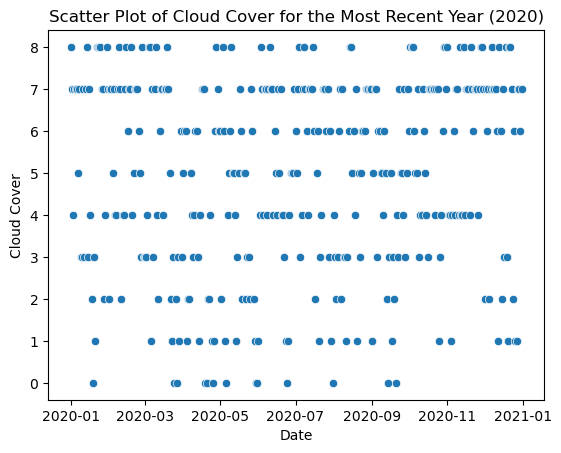

In [13]:
sns.scatterplot(x='date', y='cloud_cover', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Cloud Cover')
plt.title(f'Scatter Plot of Cloud Cover for the Most Recent Year ({most_recent_year})')
plt.show()

#Visualization for single year timeframe for cloud cover data 

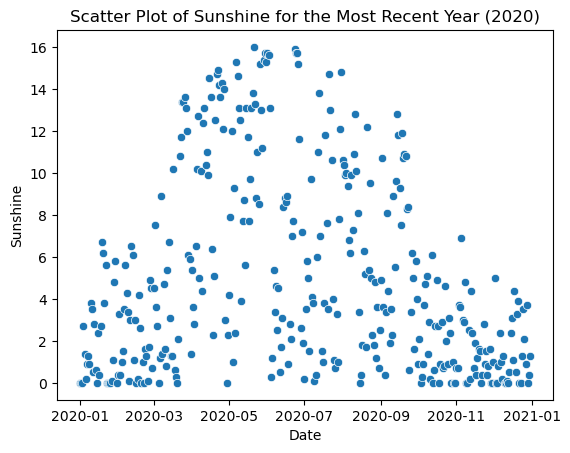

In [14]:
sns.scatterplot(x='date', y='sunshine', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Sunshine')
plt.title(f'Scatter Plot of Sunshine for the Most Recent Year ({most_recent_year})')
plt.show()

#Now for Sunshine, slight seasonality compared to mean temp

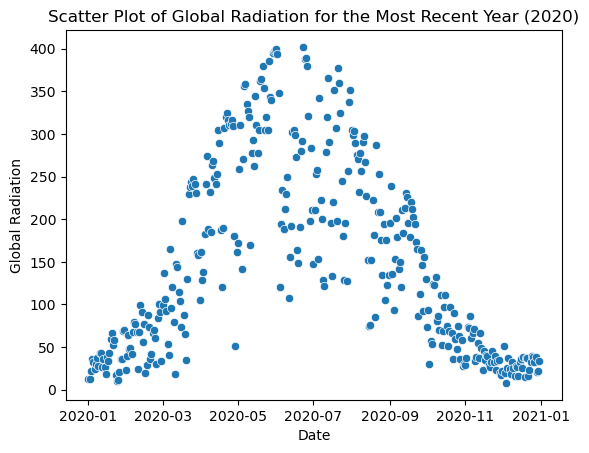

In [15]:
sns.scatterplot(x='date', y='global_radiation', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Global Radiation')
plt.title(f'Scatter Plot of Global Radiation for the Most Recent Year ({most_recent_year})')
plt.show()

#Radiation, can note the seasonality 

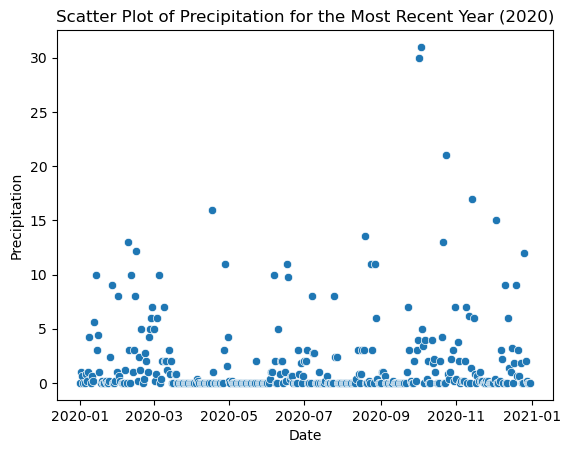

In [16]:
sns.scatterplot(x='date', y='precipitation', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title(f'Scatter Plot of Precipitation for the Most Recent Year ({most_recent_year})')
plt.show()

#Here for Precipiation; appears quite random

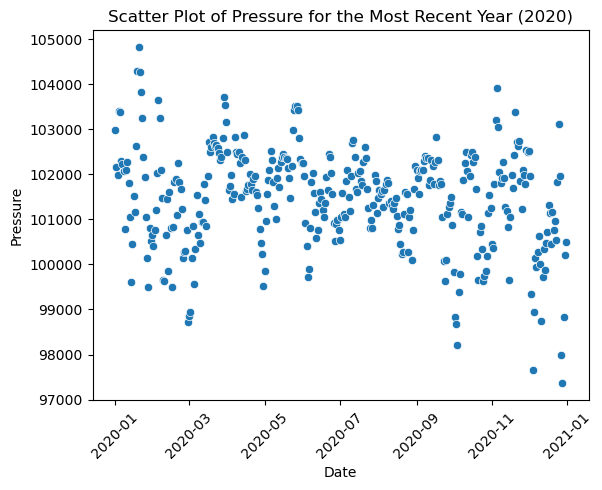

In [17]:
sns.scatterplot(x='date', y='pressure', data=recent_year_data)
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title(f'Scatter Plot of Pressure for the Most Recent Year ({most_recent_year})')
plt.xticks(rotation=45)
plt.show()

#Now for pressure; appears to have some pattern however different from the seasonality of mean temp. Further analysis needed

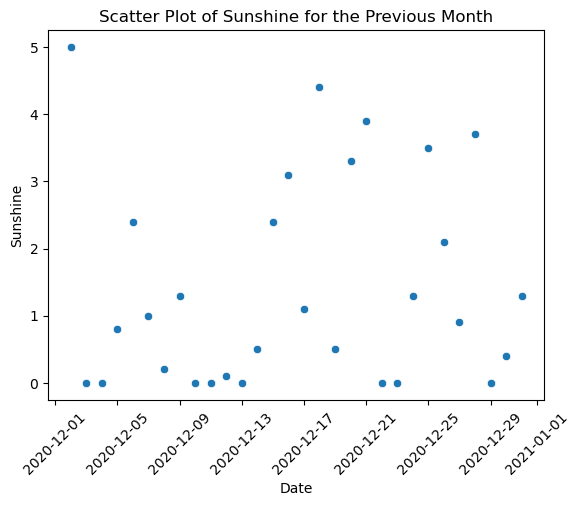

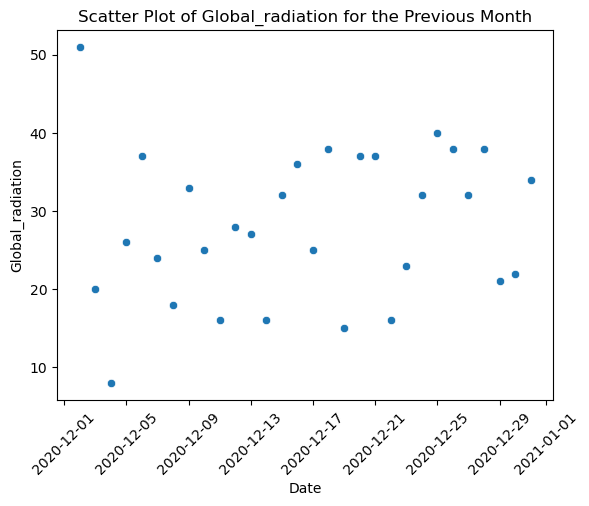

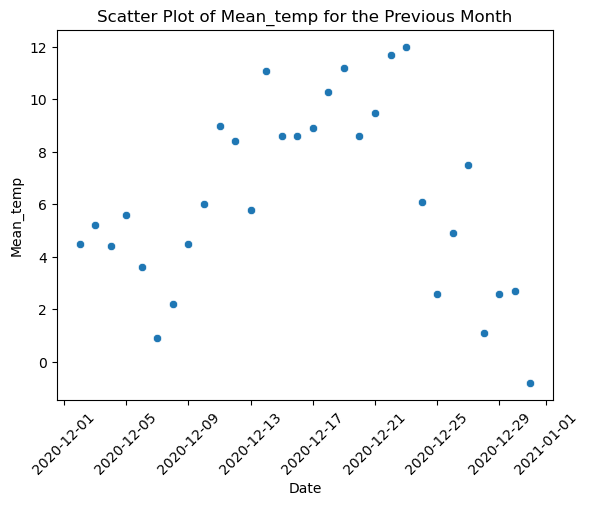

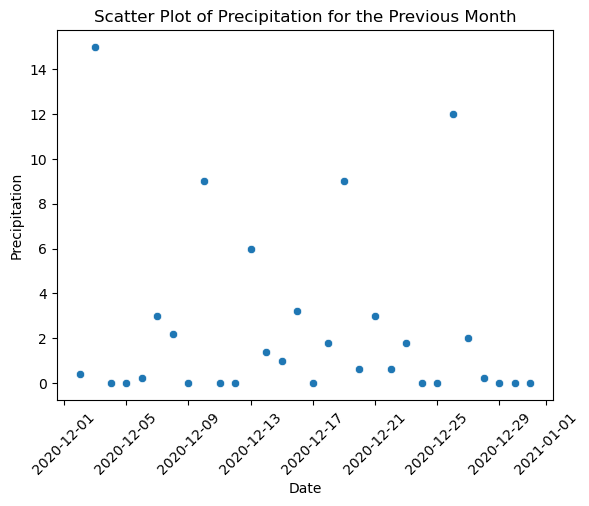

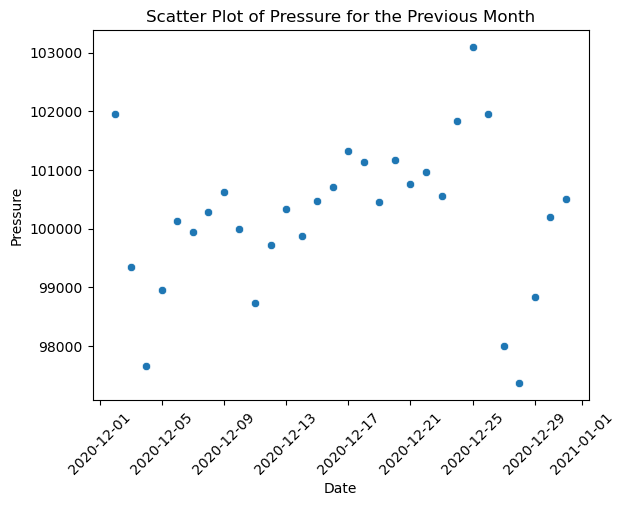

In [18]:
previous_month_data = df.tail(30)
numeric_columns = ['sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure']
for column in numeric_columns:
    sns.scatterplot(x='date', y=column, data=previous_month_data)
    plt.xlabel('Date')
    plt.ylabel(column.capitalize())  
    plt.title(f'Scatter Plot of {column.capitalize()} for the Previous Month')
    plt.xticks(rotation=45)
    plt.show()
#Show some weather features over a month to get a detailed visual on the fluctuation of this data on a day by day, week by week basis.

In [19]:
correlation_matrix = df[['mean_temp', 'cloud_cover', 'sunshine', 'global_radiation','precipitation', 'pressure']].corr()
correlation_with_mean_temp = correlation_matrix['mean_temp']
print("Correlation of each column with 'mean_temp':")
print(correlation_with_mean_temp)

#Now to verify some of what was noted from the EDA visuals regarding if some features display similar fluctuation patterns,
#the correlation of each feature with respect to mean temperature provides insight into how similar these features fluctuate 
#in a manner aligned with that of the seasonality for temperature

Correlation of each column with 'mean_temp':
mean_temp           1.000000
cloud_cover        -0.112260
sunshine            0.396763
global_radiation    0.635904
precipitation      -0.010809
pressure            0.004805
Name: mean_temp, dtype: float64


In [20]:
correlation_matrix = df.corr()
print("Correlation matrix for all columns:")
correlation_matrix

Correlation matrix for all columns:


C:\Users\adam\AppData\Local\Temp\ipykernel_7936\2308189193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure
cloud_cover,1.000000,-0.738229,-0.487112,-0.213226,-0.112260,0.047633,0.234323,-0.240417
sunshine,-0.738229,1.000000,0.852159,0.472089,0.396763,0.219088,-0.231565,0.226804
global_radiation,-0.487112,0.852159,1.000000,0.691314,0.635904,0.478476,-0.163145,0.150449
max_temp,-0.213226,0.472089,0.691314,1.000000,0.912314,0.810526,-0.071918,0.100396
mean_temp,-0.112260,0.396763,0.635904,0.912314,1.000000,0.955520,-0.010809,0.004805
min_temp,0.047633,0.219088,0.478476,0.810526,0.955520,1.000000,0.037208,-0.074227
precipitation,0.234323,-0.231565,-0.163145,-0.071918,-0.010809,0.037208,1.000000,-0.349418
pressure,-0.240417,0.226804,0.150449,0.100396,0.004805,-0.074227,-0.349418,1.000000


Time Series Analysis

Mean Squared Error on Testing Set: 32.155905666823166
Slope: 1.6085806244318141e-18


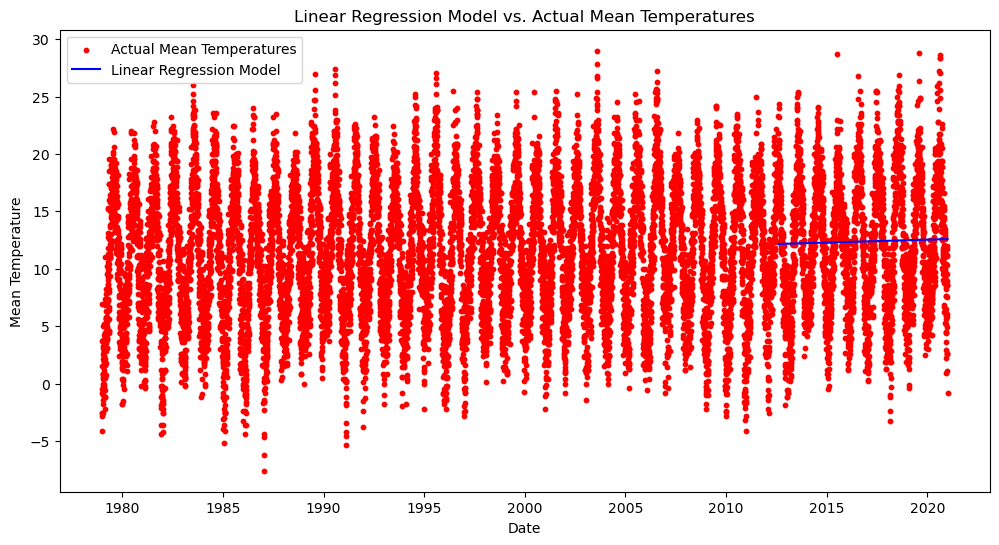

In [21]:
#First test to see how a linear method will perform on the data to create a model. From the EDA, we know this model will 
#likely be poor due to the seasonality and overall magnitude of fluctuations present over time

#split the data into a training and test set
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
train_percentage = 0.8
split_index = int(len(df) * train_percentage)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

X_train = np.array(train_data['date']).astype(np.int64).reshape(-1, 1)
y_train = train_data['mean_temp']

X_test = np.array(test_data['date']).astype(np.int64).reshape(-1, 1)
y_test = test_data['mean_temp']

#create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

#calculate mse of this model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Testing Set:", mse)
slope = model.coef_[0]
print("Slope:", slope)
#plot the model
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['mean_temp'], label='Actual Mean Temperatures', color='red', s=10)
plt.plot(test_data['date'], predictions, label='Linear Regression Model', color='blue')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Linear Regression Model vs. Actual Mean Temperatures')
plt.legend()
plt.show()



ACF values: [1.         0.94041019 0.8852012  0.84937625 0.82598987 0.80895908
 0.79735918 0.78659104 0.7762041  0.76770673 0.76126517 0.75487549
 0.7480163  0.74233594 0.73704647 0.73176529 0.72547835 0.72162139
 0.71936057 0.71508902 0.71123031 0.70704116 0.70267517 0.69790821
 0.68977781 0.68188494 0.6761394  0.66997918 0.66355814 0.65766238
 0.65192475 0.64515026 0.63915002 0.6333399  0.62690312 0.6215709
 0.61545853 0.60772159 0.59991995 0.59017268 0.58068433 0.57173676
 0.56416254 0.55677357 0.54851901 0.53781555 0.52678496 0.51668678
 0.50636937 0.49423781 0.48401651]
PACF values: [ 1.00000000e+00  9.40471490e-01  7.18530239e-03  1.39838299e-01
  1.01979349e-01  8.05283364e-02  8.52736114e-02  4.94334585e-02
  4.59631078e-02  5.12867195e-02  4.96756637e-02  3.40702657e-02
  2.78233156e-02  3.71014117e-02  2.77975809e-02  2.47185582e-02
  1.24939909e-02  3.93672110e-02  3.29180722e-02  6.70433684e-03
  2.56686561e-02  1.24733014e-02  1.45977615e-02  9.16345801e-03
 -2.19504332e-0

D:\certificationstuff\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


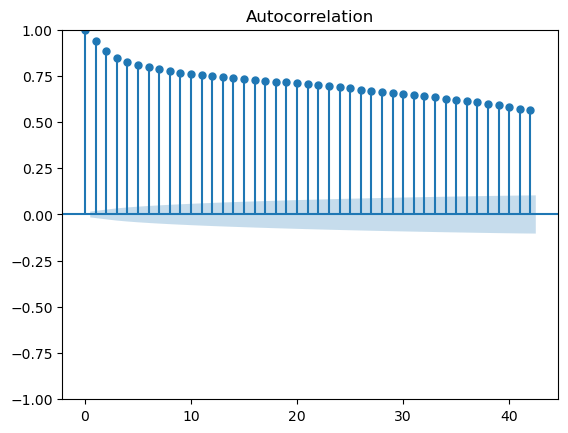

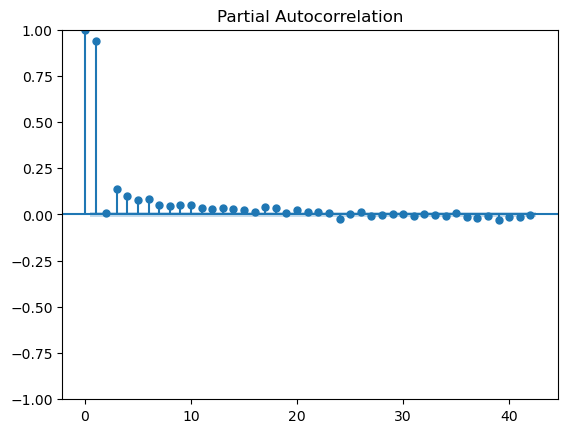

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
#This gets the values for average temperature in the data
mean_temp_values = df['mean_temp'].values
#Here we calculate the acf and paccf for 50 lags
lags = 50  
acf_values = acf(mean_temp_values, nlags=lags)
pacf_values = pacf(mean_temp_values, nlags=lags)
#show both acf and pacf
print("ACF values:", acf_values)
print("PACF values:", pacf_values)
#plot both
plot_acf(df['mean_temp'])
plot_pacf(df['mean_temp'])
plt.show()

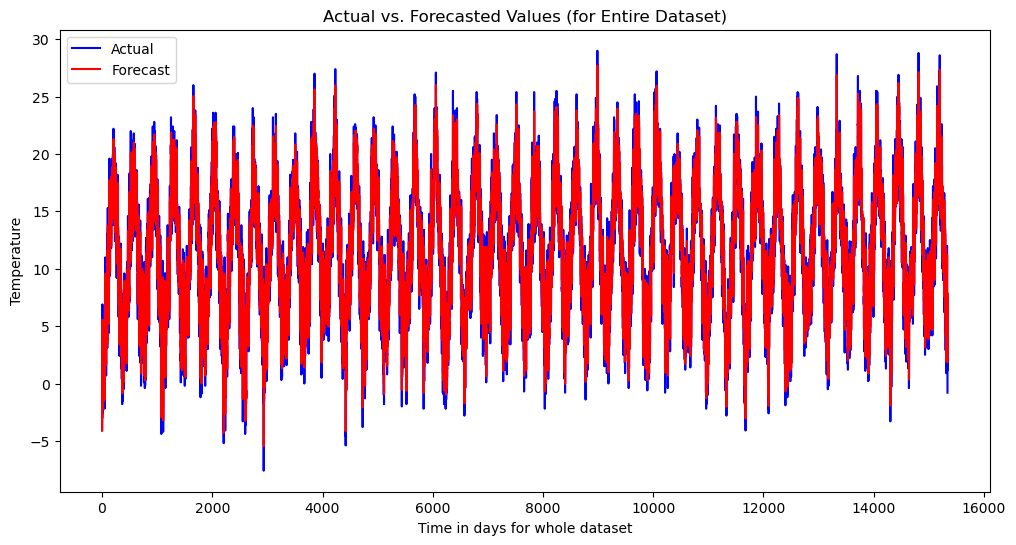

In [70]:
#Use the stats model library to get the ARIMA function
from statsmodels.tsa.arima.model import ARIMA
#here we utilize ARIMA function with the parameters for Autoregression, intregrated which is for differencing and moving average
#3 is used for AR since in the acf plot we the first three lags which are drastic from which it tapers off, 1 for I since there is not trend aside from seasonality, 
#and 2 for MA since there are two notable spikes in pacf
arima_model = ARIMA(df['mean_temp'], order=(3, 1, 2))
fitted_model = arima_model.fit()
#use the predct function to forecast the values based on the model
forecast = fitted_model.predict()
#This is to plot the model
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mean_temp'], label='Actual', color='blue')
plt.plot(df.index, forecast, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Values (for Entire Dataset)')
plt.xlabel('Time in days for whole dataset')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#This is done on the full dataset as we first wanted to see how the model would resemble it. From this point we noticed
#it is highly fitted which raised concers of overfitting. As a result, this incited thinking that a model of this nature may be 
#overly compex and a simplier approach could be used to forecast this.
#Can view the model below. 

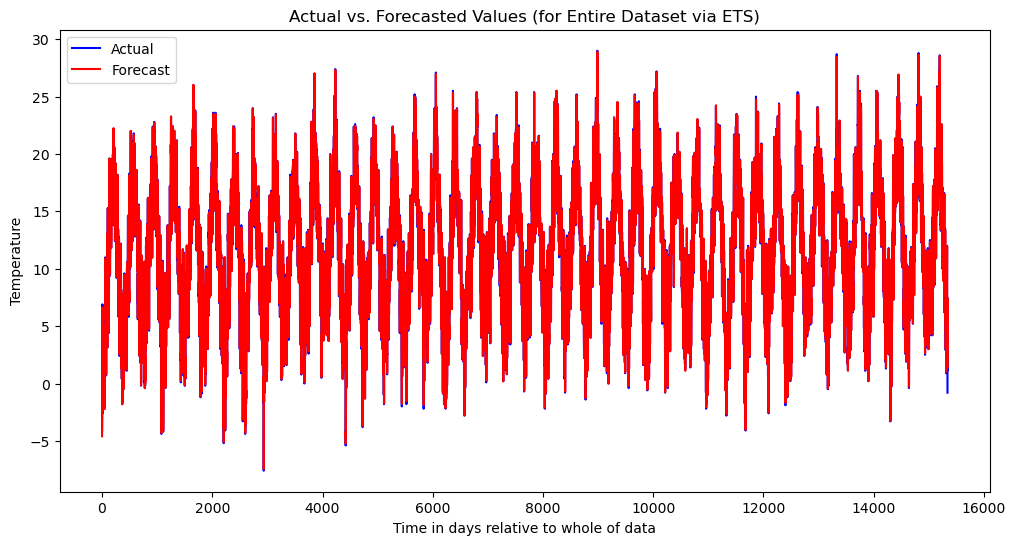

In [69]:
#Use the statsmodel library to get the function for ets 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#This uses the exponentialsmotthing function to generate a model based on the mean temperature 
ets_model = ExponentialSmoothing(df['mean_temp'], trend='add', seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()
#Here the model is used to make a forecast
forecast = fitted_ets_model.predict(start=0, end=len(df) - 1)
#This plots the actual data against the model in a visual
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mean_temp'], label='Actual', color='blue')
plt.plot(df.index, forecast, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Values (for Entire Dataset via ETS)')
plt.xlabel('Time in days relative to whole of data')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#From ARIMA we pivoted to ETS and used the full dataset to see how fitted the model would be on the data. Once again, this 
#model was highly fitted onto the data and led use to consider another approach that captures the seasonality of the data
#without being a risk of being overfitted.
#The plot below briefly shows the model.

Mean Squared Error: 9.053050808799965


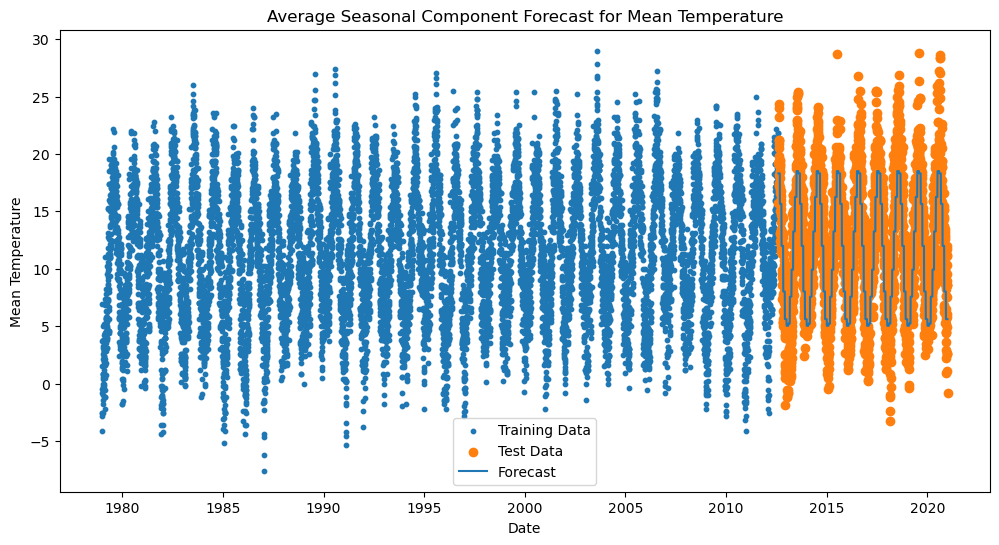

In [22]:
#split training and test set
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date')

train_percentage = 0.8

split_index = int(len(df) * train_percentage)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

#create a model based on the average monthly seasonality of each month in the training set
monthly_seasonal = train_data.groupby(train_data['date'].dt.month)['mean_temp'].mean()

month_to_seasonal = dict(zip(monthly_seasonal.index, monthly_seasonal))

#forecast the model to the test set
forecast = test_data['date'].dt.month.map(month_to_seasonal)
#calculate mse of the model
mse = mean_squared_error(test_data['mean_temp'], forecast)
print("Mean Squared Error:", mse)
#plot the model
plt.figure(figsize=(12, 6))
plt.scatter(train_data['date'], train_data['mean_temp'], label='Training Data', marker='o', s=10)  
plt.scatter(test_data['date'], test_data['mean_temp'], label='Test Data', marker='o') 
plt.plot(test_data['date'], forecast, label='Forecast', linestyle='-') 

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Average Seasonal Component Forecast for Mean Temperature')
plt.legend()
plt.show()

In [34]:
#quick look at the residuals
residuals = test_data['mean_temp'] - forecast
residuals

12272   -3.336364
12273    0.196970
12274    0.848485
12275    1.878788
12276    0.639394
           ...   
15336    2.460606
15337   -3.854545
15338   -2.563636
15339   -2.439394
15340   -5.150000
Length: 3069, dtype: float64

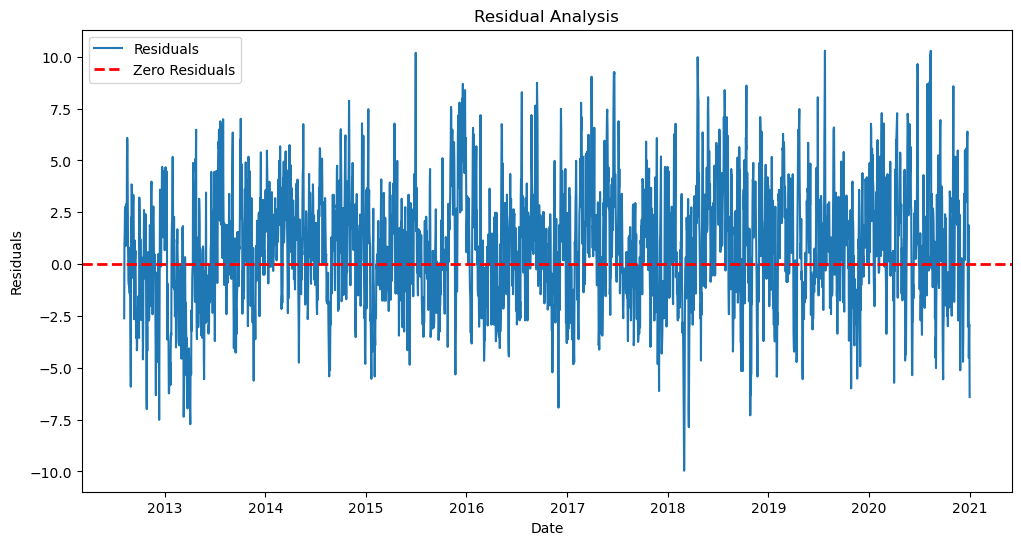

In [24]:
#create a graph which shows the residual spread
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

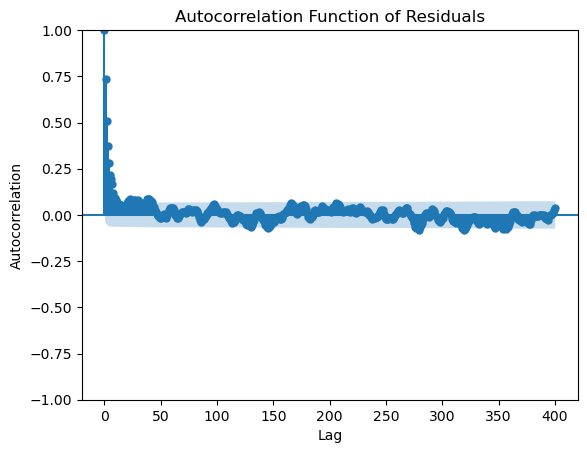

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
#create a graph of the autocorrelation of the residuals
plot_acf(residuals, lags=400)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Residuals')
plt.show()

The visualization for the autocorrelations makes sense given the context of the data. Temperature data over time is likely to have a high autocorrelation at a smaller number of lags sice the previous data at these lesser lags is quite similar to that of a hypothetical current temperature. This means that the autocorrelation here would be quite high as seen in the visual and decrease as the lags continue fartehr from the current temp. The fact that the AC tapers off with fluctuations about zero indicates that from around lag 50 onward, the datapiints here are not singligcantly impacting those at a current point in time

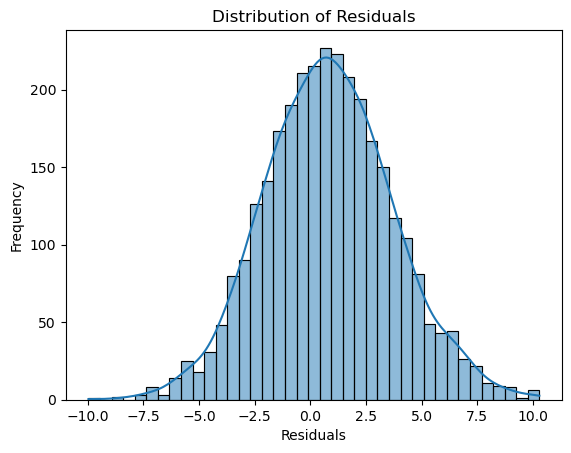

In [26]:
from scipy.stats import probplot
#show a graph of the distribution of the resituals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

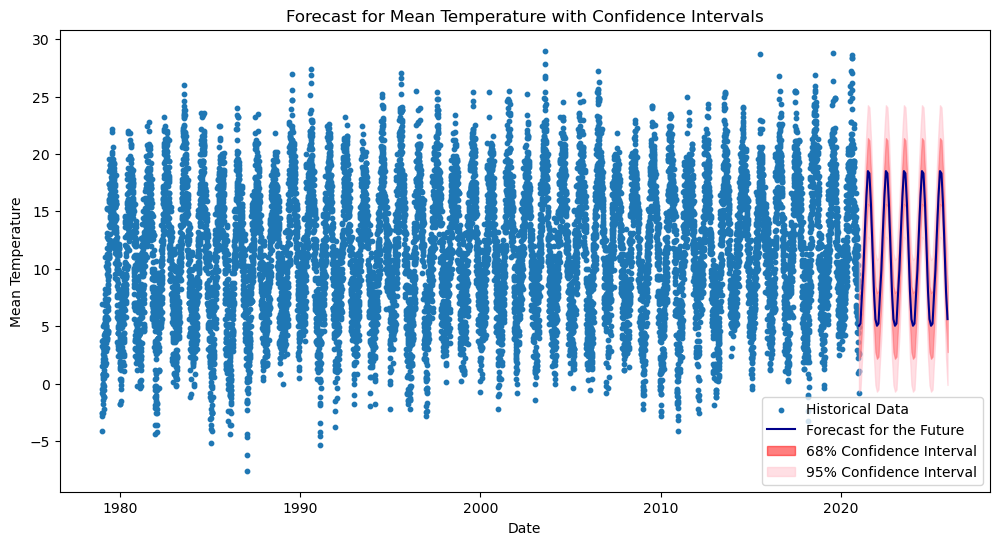

In [35]:
#similar to the previous graph but forecasts the model for future values
twomonthly_seasonal = df.groupby(df['date'].dt.month)['mean_temp'].mean()

twomonth_to_seasonal = dict(zip(monthly_seasonal.index, monthly_seasonal))

df['average_seasonal'] = df['date'].dt.month.map(month_to_seasonal)

twoforecast = df['date'].dt.month.map(month_to_seasonal)

future_dates = pd.date_range(start=df['date'].max() + pd.DateOffset(1), periods=5 * 12, freq='MS')
extended_forecast = future_dates.month.map(month_to_seasonal)

#creates a standard deviation spread for the forecast
residuals = df['mean_temp'] - forecast

std_dev = np.std(residuals)

upper_bound_1std = extended_forecast + std_dev 
lower_bound_1std = extended_forecast - std_dev

upper_bound_2std = extended_forecast + 2 * std_dev 
lower_bound_2std = extended_forecast - 2 * std_dev

#plots the model
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['mean_temp'], label='Historical Data', marker='o', s=10) 
plt.plot(future_dates, extended_forecast, label='Forecast for the Future', color='darkblue')  
plt.fill_between(future_dates, lower_bound_1std, upper_bound_1std, color='red', alpha=0.5, label='68% Confidence Interval')
plt.fill_between(future_dates, lower_bound_2std, upper_bound_2std, color='pink', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Forecast for Mean Temperature with Confidence Intervals')
plt.legend()
plt.show()

C:\Users\adam\AppData\Local\Temp\ipykernel_7936\1346894956.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['average_seasonal'] = train_data['date'].dt.dayofyear.map(day_to_seasonal)


Mean Squared Error: 8.938186477935957


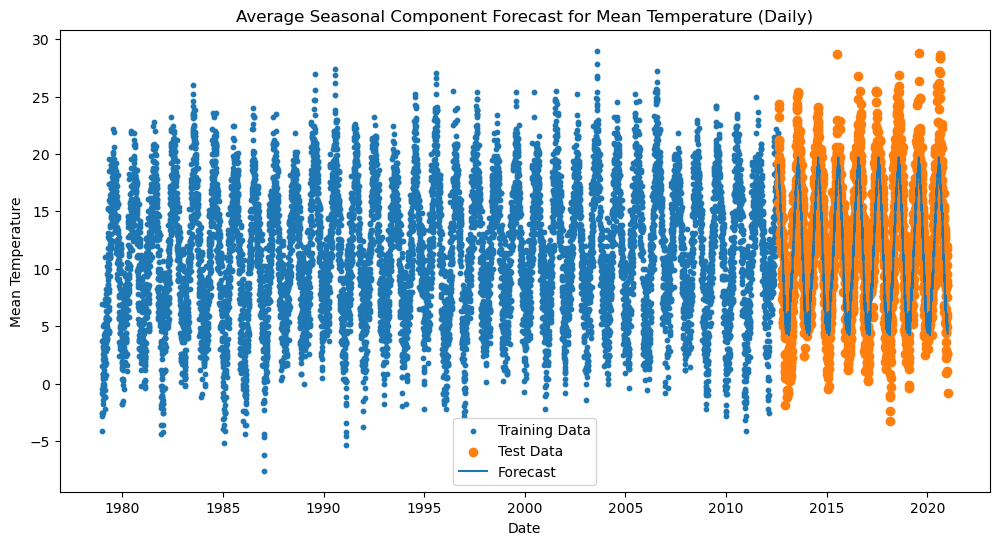

In [28]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

train_percentage = 0.8

split_index = int(len(df) * train_percentage)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# creates a model with a daily seasonality component
daily_seasonal = train_data.groupby(train_data['date'].dt.dayofyear)['mean_temp'].mean()
day_to_seasonal = dict(zip(daily_seasonal.index, daily_seasonal))
train_data['average_seasonal'] = train_data['date'].dt.dayofyear.map(day_to_seasonal)

# Forecasts for the Test Set
forecast = test_data['date'].dt.dayofyear.map(day_to_seasonal)

# Calculate mse
mse = mean_squared_error(test_data['mean_temp'], forecast)
print("Mean Squared Error:", mse)

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.scatter(train_data['date'], train_data['mean_temp'], label='Training Data', marker='o', s=10)  
plt.scatter(test_data['date'], test_data['mean_temp'], label='Test Data', marker='o') 
plt.plot(test_data['date'], forecast, label='Forecast', linestyle='-') 

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Average Seasonal Component Forecast for Mean Temperature (Daily)')
plt.legend()
plt.show()

In [36]:
#quick look at the residuals
residuals = test_data['mean_temp'] - forecast
residuals

12272   -3.336364
12273    0.196970
12274    0.848485
12275    1.878788
12276    0.639394
           ...   
15336    2.460606
15337   -3.854545
15338   -2.563636
15339   -2.439394
15340   -5.150000
Length: 3069, dtype: float64

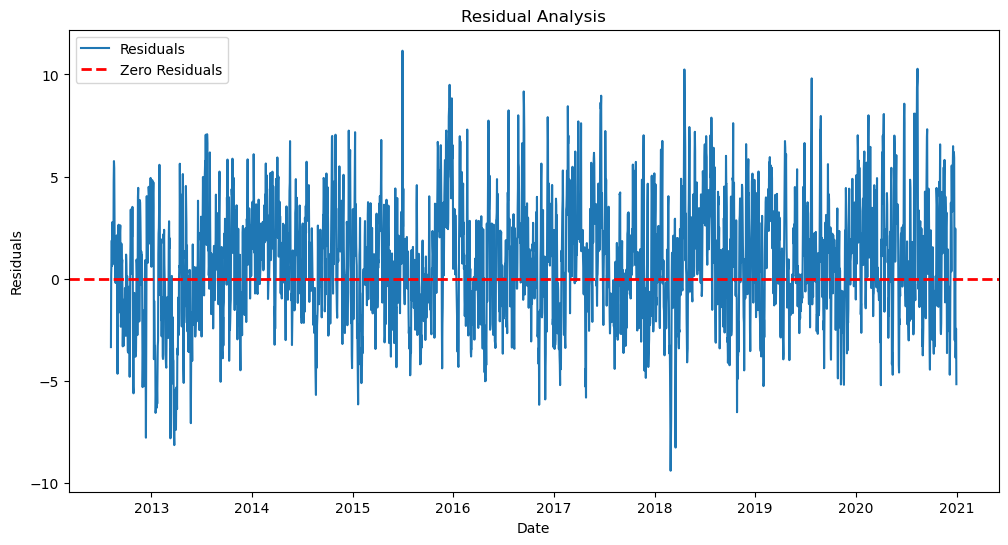

In [30]:
#graph the residuals
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

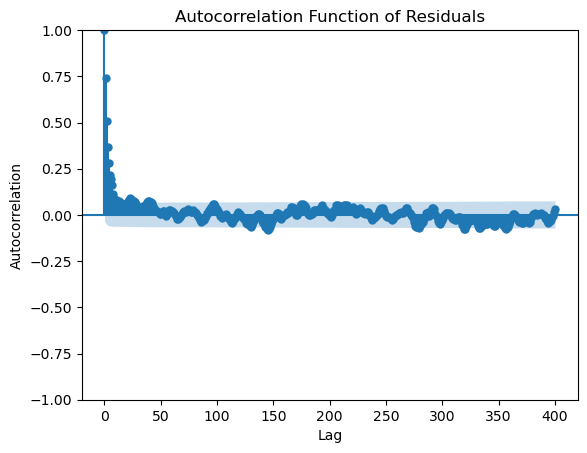

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
#graph of the autocorrelation
plot_acf(residuals, lags=400)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Residuals')
plt.show()


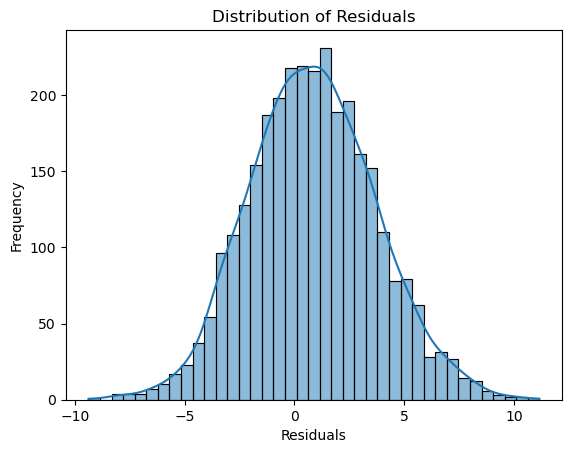

In [32]:
from scipy.stats import probplot
#graph of the distribution of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

C:\Users\adam\AppData\Local\Temp\ipykernel_7936\616176023.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['average_seasonal'] = train_data['date'].dt.dayofyear.map(day_to_seasonal)


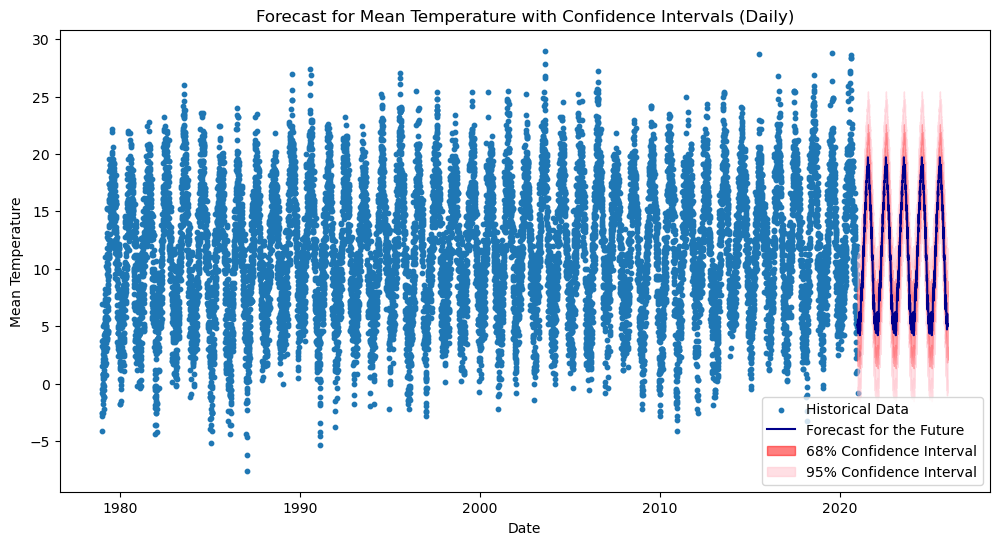

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# split the test and training sets
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

train_percentage = 0.8

split_index = int(len(df) * train_percentage)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# create daily seasonal component
daily_seasonal = train_data.groupby(train_data['date'].dt.dayofyear)['mean_temp'].mean()
day_to_seasonal = dict(zip(daily_seasonal.index, daily_seasonal))
train_data['average_seasonal'] = train_data['date'].dt.dayofyear.map(day_to_seasonal)

# Generate forecasts
forecast = test_data['date'].dt.dayofyear.map(day_to_seasonal)

# Calculate residuals and standard deviation
residuals = test_data['mean_temp'] - forecast
std_dev = np.std(residuals)

future_dates = pd.date_range(start=df['date'].max() + pd.DateOffset(1), periods=5 * 365, freq='D')
extended_forecast = future_dates.dayofyear.map(day_to_seasonal)

upper_bound_1std = extended_forecast + std_dev
lower_bound_1std = extended_forecast - std_dev

upper_bound_2std = extended_forecast + 2 * std_dev
lower_bound_2std = extended_forecast - 2 * std_dev

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['mean_temp'], label='Historical Data', marker='o', s=10)
plt.plot(future_dates, extended_forecast, label='Forecast for the Future', color='darkblue')
plt.fill_between(future_dates, lower_bound_1std, upper_bound_1std, color='red', alpha=0.5, label='68% Confidence Interval')
plt.fill_between(future_dates, lower_bound_2std, upper_bound_2std, color='pink', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Forecast for Mean Temperature with Confidence Intervals (Daily)')
plt.legend()
plt.show()

In [51]:
#This code block houses logic for predicting the mean temperature for a day in the future based on our forecast
#We saw this as a useful feature to add on as a functional tool based on our model
import pandas as pd
import numpy as np

def predict_mean_temperature(input_date):
    input_date = pd.to_datetime(input_date, format='%m/%d/%Y')  #the input date format
    day_of_year = input_date.dayofyear
    prediction = day_to_seasonal.get(day_of_year, np.nan)

    return prediction

input_date = '01/24/2022'
predicted_temperature = predict_mean_temperature(input_date)

print(f"Predicted mean temperature for {input_date}: {predicted_temperature:.2f}°C")

Predicted mean temperature for 01/24/2022: 4.98°C
